In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

In [8]:
data = pd.read_csv("Dados_Aeronautica_3.csv",sep=";")

In [9]:
# Visualização da base inserida.
data.loc[1]

ocorrencia_classificacao                  INCIDENTE
ocorrencia_latitude                             NaN
ocorrencia_longitude                            NaN
ocorrencia_cidade                             BELÉM
ocorrencia_uf                                    PA
ocorrencia_aerodromo                           SBBE
ocorrencia_dia                           03/01/2010
investigacao_aeronave_liberada                  SIM
investigacao_status                      FINALIZADA
divulgacao_relatorio_publicado                  NÃO
total_recomendacoes                               0
total_aeronaves_envolvidas                        1
ocorrencia_saida_pista                          NÃO
ocorrencia_tipo                     COLISÃO COM AVE
ocorrencia_tipo_categoria           COLISÃO COM AVE
aeronave_operador_categoria                 REGULAR
aeronave_tipo_veiculo                         AVIÃO
aeronave_fabricante                AIRBUS INDUSTRIE
aeronave_motor_tipo                            JATO
aeronave_mot

In [40]:
# Investigação dos dados de quando há fatalidades
data.query('aeronave_fatalidades_total > 0').head(15)

,ocorrencia_classificacao,ocorrencia_latitude,ocorrencia_longitude,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,investigacao_aeronave_liberada,investigacao_status,divulgacao_relatorio_publicado,...,aeronave_nivel_dano,aeronave_fatalidades_total,Houve_fatalidades,fator_nome,fator_aspecto,fator_condicionante,fator_area,mês/ano,ocorrencia_ano,ocorrencia_mes
15,ACIDENTE,-6.615,-641.116.666.667,CANUTAMA,AM,****,15/01/2010,SIM,FINALIZADA,SIM,...,***,2,1,ATITUDE,ASPECTO PSICOLÓGICO,INDIVIDUAL,FATOR_HUMANO,1/2010,2010,1
28,ACIDENTE,-152.402.777.778,-593.541.666.667,PONTES E LACERDA,MT,****,23/01/2010,***,FINALIZADA,SIM,...,DESTRUÍDA,1,1,APLICAÇÃO DE COMANDOS,DESEMPENHO DO SER HUMANO,OPERAÇÃO DA AERONAVE,FATOR_OPERACIONAL,1/2010,2010,1
31,ACIDENTE,***,***,CASIMIRO DE ABREU,RJ,****,24/01/2010,***,NaN,NÃO,...,SUBSTANCIAL,1,1,#N/D,#N/D,#N/D,#N/D,1/2010,2010,1
32,ACIDENTE,-2.6,-518.441.666.667,SENADOR JOSÉ PORFÍRIO,PA,****,25/01/2010,***,FINALIZADA,SIM,...,SUBSTANCIAL,2,1,ATITUDE,ASPECTO PSICOLÓGICO,INDIVIDUAL,FATOR_HUMANO,1/2010,2010,1
37,ACIDENTE,-234.125,-475.583.333.333,IPERÓ,SP,****,27/01/2010,SIM,FINALIZADA,SIM,...,DESTRUÍDA,2,1,ANSIEDADE,ASPECTO MÉDICO,***,FATOR_HUMANO,1/2010,2010,1
48,ACIDENTE,-180.583.333.333,-501.458.333.333,ITUMBIARA,GO,****,06/02/2010,SIM,FINALIZADA,SIM,...,DESTRUÍDA,1,1,PLANEJAMENTO DE VOO,DESEMPENHO DO SER HUMANO,OPERAÇÃO DA AERONAVE,FATOR_OPERACIONAL,2/2010,2010,6
49,ACIDENTE,***,***,RIO DE JANEIRO,RJ,****,06/02/2010,***,NaN,NÃO,...,SUBSTANCIAL,2,1,#N/D,#N/D,#N/D,#N/D,2/2010,2010,6
58,ACIDENTE,-235.758.333.333,-467.022.222.222,SÃO PAULO,SP,****,10/02/2010,SIM,FINALIZADA,SIM,...,DESTRUÍDA,1,1,APLICAÇÃO DE COMANDOS,DESEMPENHO DO SER HUMANO,OPERAÇÃO DA AERONAVE,FATOR_OPERACIONAL,2/2010,2010,10
73,ACIDENTE,-199.602.777.778,-439.094.444.444,BELO HORIZONTE,MG,****,26/02/2010,SIM,FINALIZADA,SIM,...,DESTRUÍDA,2,1,ATITUDE,ASPECTO PSICOLÓGICO,INDIVIDUAL,FATOR_HUMANO,2/2010,2010,2
155,ACIDENTE,-224.761.111.111,-444.711.111.111,RESENDE,RJ,****,27/04/2010,SIM,FINALIZADA,SIM,...,DESTRUÍDA,2,1,APLICAÇÃO DE COMANDOS,DESEMPENHO DO SER HUMANO,OPERAÇÃO DA AERONAVE,FATOR_OPERACIONAL,4/2010,2010,4


In [ ]:
# 1ª hipótese: Há um fator predominante quando há fatalidades.

In [41]:
data.query('Houve_fatalidades == 1 & fator_area != "#N/D" & fator_area != "***"').groupby(['fator_area','Houve_fatalidades']).agg({'fator_area': np.size, 'aeronave_tipo_operacao': np.size})

,,fator_area,aeronave_tipo_operacao
fator_area,Houve_fatalidades,,
FATOR_HUMANO,1,69,69
FATOR_MATERIAL,1,1,1
FATOR_OPERACIONAL,1,97,97


In [ ]:
# Resultado: Não parece ter correlações fortes na análise superficial. Pode ser revisitado depois.

In [ ]:
# 2ª hipótese: Algum ou alguns estados tem maior número de ocorrências.

In [12]:
data.groupby('ocorrencia_uf').agg({'ocorrencia_uf':np.size})

,ocorrencia_uf
ocorrencia_uf,
***,1
AC,58
AL,33
AM,233
AP,13
BA,213
CE,88
DF,135
ES,75


In [ ]:
# Resultado: Nada que chame atenção. 
# SP tenderia a ter maior número de ocorrências por causa do tráfego aéreo da área.

In [ ]:
# 3ª hipótese: As ocorrências tem sazonalidade. 

In [13]:
data['ocorrencia_ano'] = pd.DatetimeIndex(data['ocorrencia_dia']).year

In [14]:
data['ocorrencia_mes'] = pd.DatetimeIndex(data['ocorrencia_dia']).month

In [15]:
data.groupby('ocorrencia_ano').agg({'ocorrencia_ano':np.size})

,ocorrencia_ano
ocorrencia_ano,
2010,552
2011,576
2012,647
2013,654
2014,567
2015,471
2016,403
2017,432
2018,444


In [28]:
a = data.groupby('ocorrencia_mes').agg({'ocorrencia_mes':np.size})
A = a/np.sum(a)
print(A)

                ocorrencia_mes
ocorrencia_mes                
1                     0.090229
2                     0.075104
3                     0.092663
4                     0.080668
5                     0.080320
6                     0.076669
7                     0.080841
8                     0.082232
9                     0.093185
10                    0.085362
11                    0.083623
12                    0.079103


In [ ]:
# Resultado: Aparentemente não há % uma sazonalidade observada (nem de anos, nem de meses). 

In [ ]:
# No entanto, iremos observar os anos 2011, 2012 e 2013 que obtiveram maior participação no número de ocorrências.

In [31]:
b = data.groupby('ocorrencia_ano').agg({'ocorrencia_ano':np.size})
B = b/np.sum(b)
print(B)

                ocorrencia_ano
ocorrencia_ano                
2010                  0.095967
2011                  0.100139
2012                  0.112483
2013                  0.113700
2014                  0.098574
2015                  0.081885
2016                  0.070063
2017                  0.075104
2018                  0.077191
2019                  0.086231
2020                  0.088665


In [34]:
c = data.query('ocorrencia_ano == 2012').groupby('ocorrencia_mes').agg({'ocorrencia_mes':np.size})
C = c/np.sum(c)
print(C)

                ocorrencia_mes
ocorrencia_mes                
1                     0.078825
2                     0.069552
3                     0.091190
4                     0.064915
5                     0.080371
6                     0.103555
7                     0.081917
8                     0.085008
9                     0.095827
10                    0.086553
11                    0.081917
12                    0.080371


In [35]:
c = data.query('ocorrencia_ano == 2011').groupby('ocorrencia_mes').agg({'ocorrencia_mes':np.size})
C = c/np.sum(c)
print(C)

                ocorrencia_mes
ocorrencia_mes                
1                     0.098958
2                     0.095486
3                     0.076389
4                     0.081597
5                     0.081597
6                     0.078125
7                     0.093750
8                     0.065972
9                     0.079861
10                    0.093750
11                    0.079861
12                    0.074653


In [36]:
c = data.query('ocorrencia_ano == 2013').groupby('ocorrencia_mes').agg({'ocorrencia_mes':np.size})
C = c/np.sum(c)
print(C)

                ocorrencia_mes
ocorrencia_mes                
1                     0.079511
2                     0.090214
3                     0.107034
4                     0.103976
5                     0.090214
6                     0.093272
7                     0.081040
8                     0.076453
9                     0.062691
10                    0.068807
11                    0.068807
12                    0.077982


In [ ]:
# Resultado: Porcentualmente, novamente, não há nada que chame atenção na análise preliminar. 

In [ ]:
# Investigação de correlação Pearson.

In [ ]:
# Transformar variáveis qualitativas para correlação. str para category.

In [42]:
for col in ['ocorrencia_classificacao', 'ocorrencia_cidade', 'ocorrencia_uf', 'ocorrencia_aerodromo','ocorrencia_tipo','ocorrencia_tipo_categoria','aeronave_operador_categoria','aeronave_tipo_veiculo','aeronave_fabricante','aeronave_motor_tipo','aeronave_motor_quantidade',
'aeronave_pais_fabricante','aeronave_registro_segmento','aeronave_fase_operacao','aeronave_tipo_operacao','aeronave_nivel_dano','fator_nome','fator_aspecto','fator_condicionante','fator_area']:
    data[col] = data[col].astype('category').cat.codes

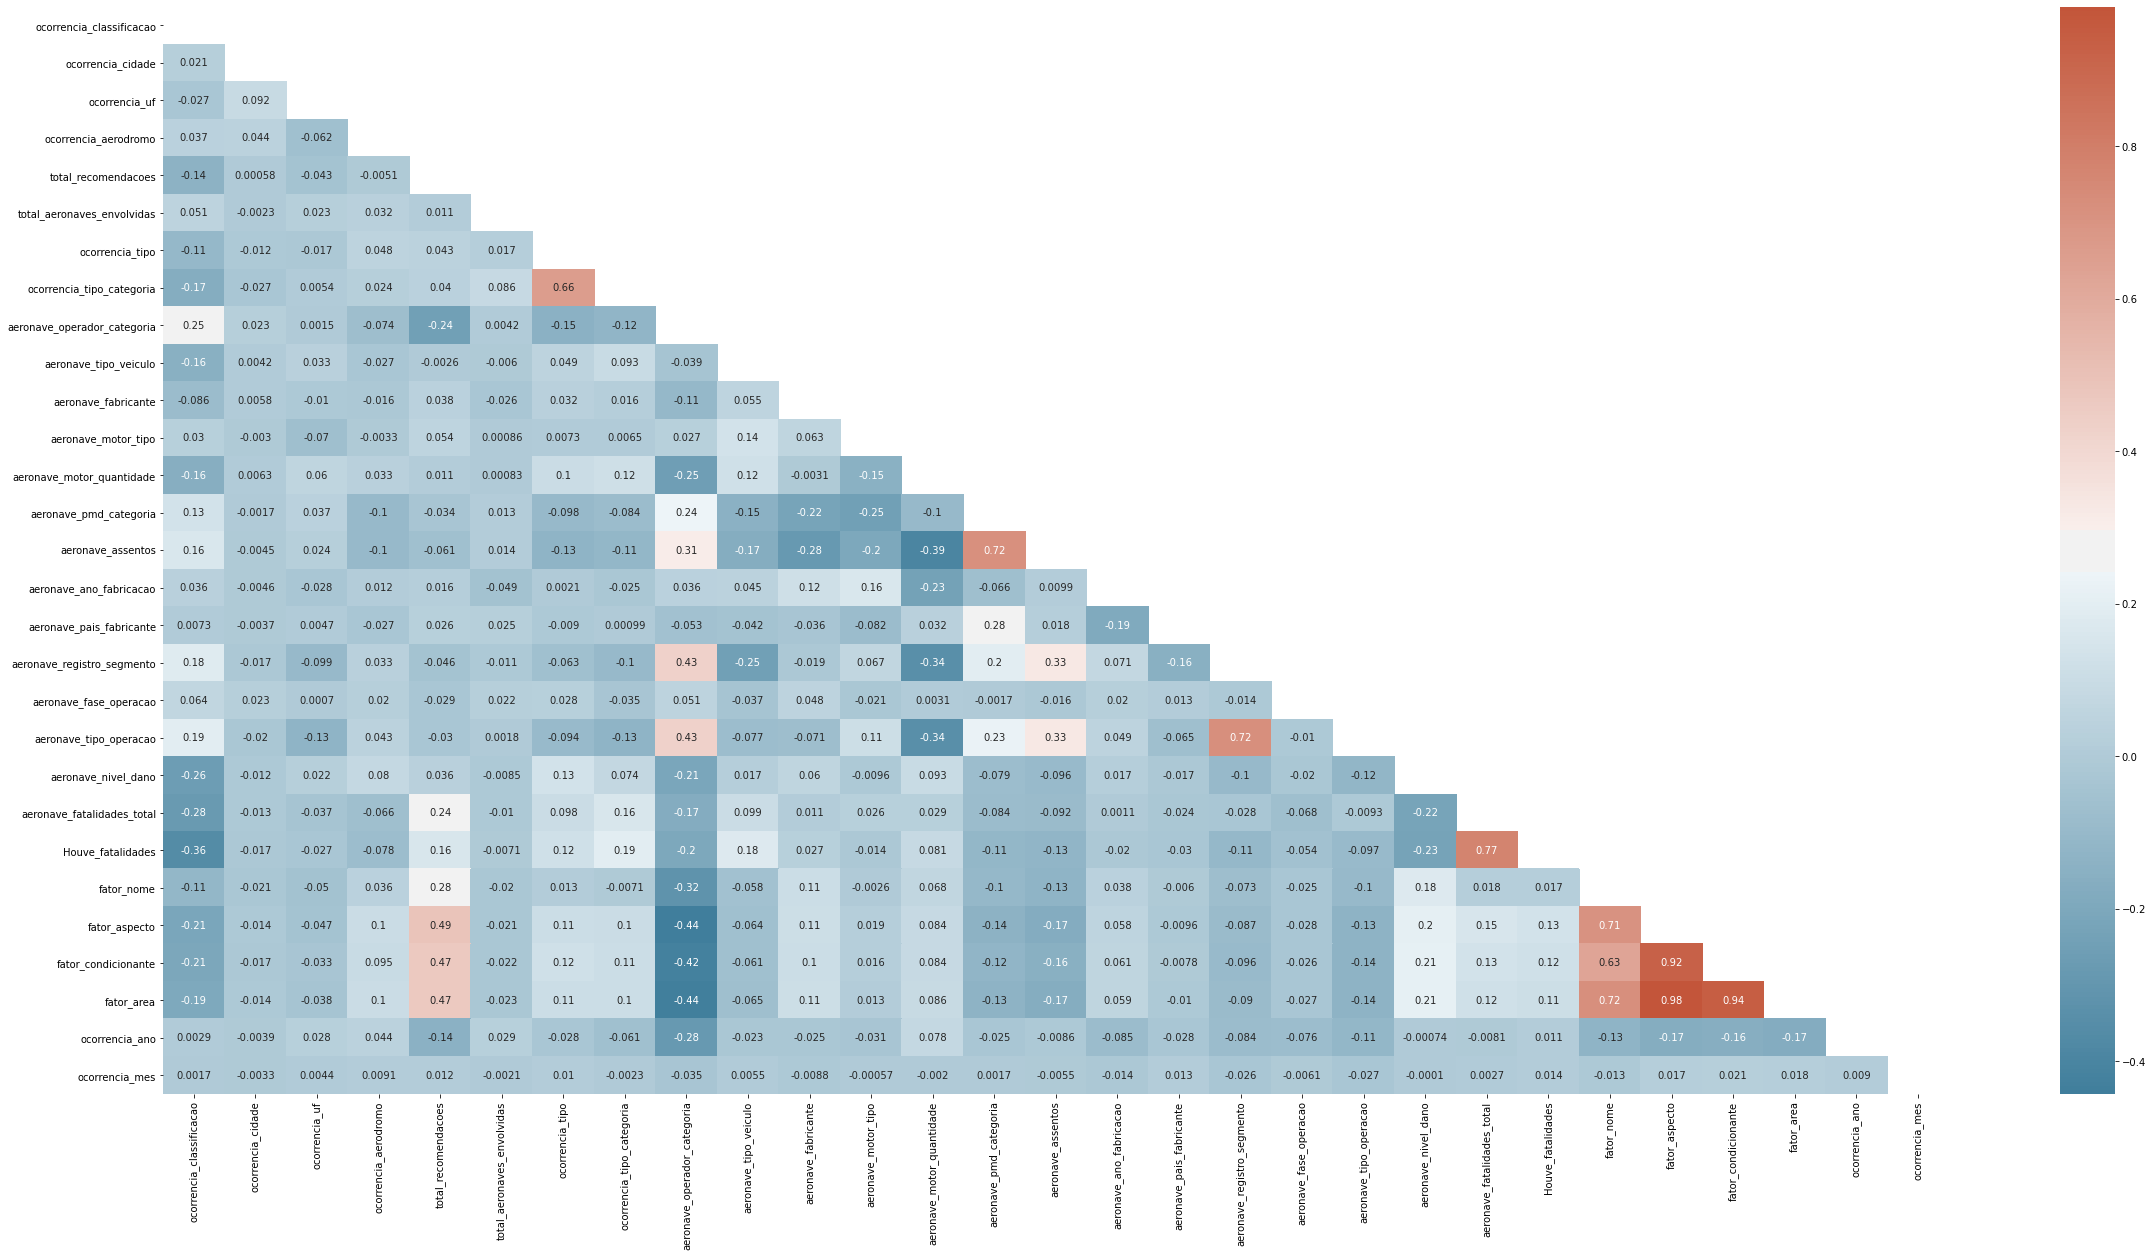

In [43]:
correlationP = data.corr(method='pearson')
f, ax = plt.subplots(figsize=(40, 20))
mask = np.triu(np.ones_like(correlationP, dtype=bool))
cmap = sn.diverging_palette(230, 20, as_cmap=True)
sn.heatmap(correlationP, annot=True, mask = mask, cmap=cmap)

In [44]:
# Heatmap acima não mostra nenhuma correlação forte entre variáveis diferentes. 
# Um detalhe no entanto, é a correlação fraca entre fator_aspecto e o total_recomendacoes.

In [45]:
# Nesse caso, vale a pena utilizar o método Spearman, que é mais indicado para dados em cross-section. 

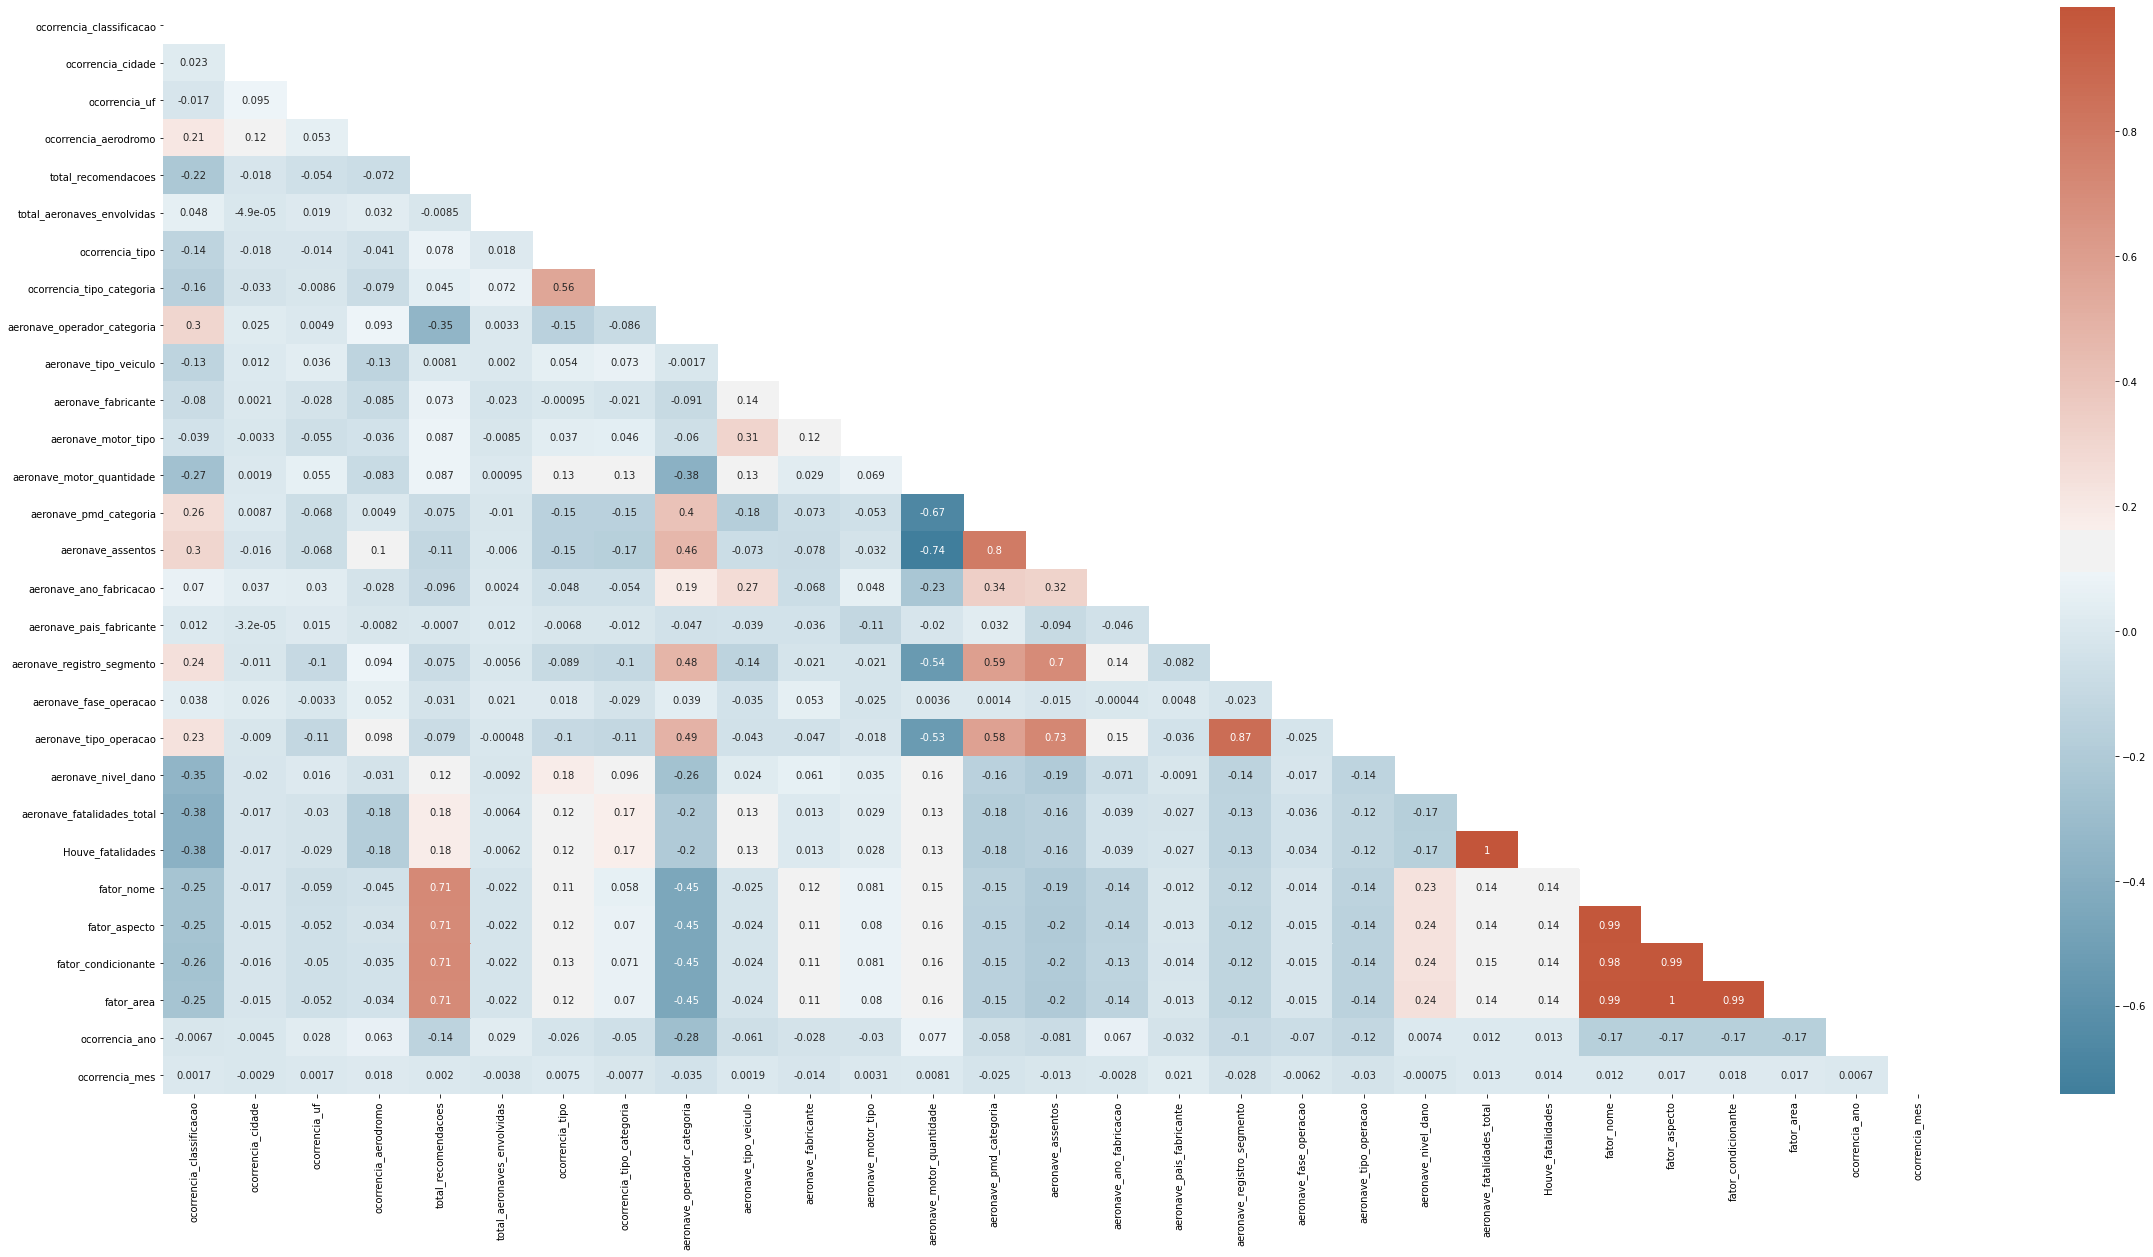

In [46]:
correlationS = data.corr(method='spearman')
f, ax = plt.subplots(figsize=(40, 20))
mask = np.triu(np.ones_like(correlationS, dtype=bool))
cmap = sn.diverging_palette(230, 20, as_cmap=True)
sn.heatmap(correlationS, annot=True, mask = mask, cmap=cmap)

In [47]:
# Para o método Spearman, é encontrado correlação forte entre fator_aspecto e total_recomendacoes.

In [56]:
# Desse ponto de partida, a análise da variável é recomendada. Na nossa base de dados original, a variável foi modificada para category.
# Sendo assim, voltaremos com a base original para investigar as variáveis.

# Hipótese 4: Um aumento na variável total_recomendacoes está diretamente ligada com um aumento de ocorrências de um único tipo em Fator_aspecto

In [50]:
data1 = pd.read_csv("Dados_Aeronautica_3.csv",sep=";")

In [52]:
data1.groupby('fator_aspecto').agg({'fator_aspecto':np.size})

,fator_aspecto
fator_aspecto,
#N/D,4688
***,12
ASPECTO DE FABRICAÇÃO,5
ASPECTO DE MANUSEIO DO MATERIAL,3
ASPECTO DE PROJETO,2
ASPECTO MÉDICO,14
ASPECTO PSICOLÓGICO,179
DESEMPENHO DO SER HUMANO,772
ELEMENTOS RELACIONADOS AO AMBIENTE OPERACIONAL,35


In [53]:
# Para ver por mês de todos os dados (variável 'mês/ano' feita diretamente no excel). 
# O fator_aspecto de maior número é o Desempenho Humano. 

In [59]:
data1.query('fator_aspecto == "DESEMPENHO DO SER HUMANO"').groupby('mês/ano').agg({'fator_aspecto':np.size, 'total_recomendacoes':np.sum})

,fator_aspecto,total_recomendacoes
mês/ano,,
1/2010,10,23
1/2011,11,34
1/2012,9,11
1/2013,7,6
1/2014,15,5
...,...,...
9/2013,14,8
9/2014,9,6
9/2015,5,8


In [57]:
# Para ver a correlação, é necessário utilizar um gráfico de pontos

In [76]:
matriz = np.array(data1.query('fator_aspecto == "DESEMPENHO DO SER HUMANO"').groupby('mês/ano').agg({'mês/ano':np.size, 'total_recomendacoes':np.sum}))
y = matriz[:,0]
X = matriz[:,1]
print(X)
print(y)

[23 34 11  6  5  8 10  5 17  3  1  4 22  5 18  5  0  3  4 35 29  4  4  3
 12  5  7  3 24 11  7  7  5 10  9  5  1 13 12  2  6  1  3  3 11 12  5  3
 13  8  8  3  5  3  2  4  7  5 20 26 10  4  5  5  7  0  5  2 24 16  7  8
 14 17  4  9  4 15 20  2  8 14  6  2  3  0 37 23  9  3  2  6  3  2 14 12
 22 16  9 16  8  2  1  5  6 28 21  8  8  6  8  4 10]
[10 11  9  7 15  4  5  5  9  5  1  4  8  6 17  9  4  7  3  7 10  8  8  5
  9  4  7  2  7  6  9 12 12  8  7  3  1  6  8 10  5 10  8  3  9  9  3  2
  7  8  5  5 15  7  3  4  5  3  9 11 12  5  9  6  6  2  3  2  4  7 14  7
  8  9  3  7  1  5  7  6 12 11  5  1  3  1 11  8  7 12  7  6  2  1  6  5
 14 14 10 11  8  1  2  3  2 11 11  8 14  9  5  4  5]


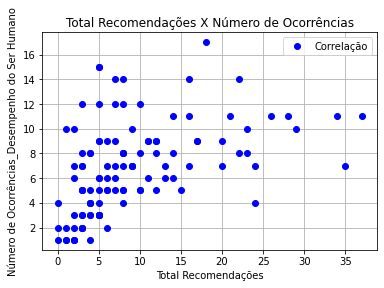

In [77]:
plt.plot(X,y,'bo')
plt.xlabel('Total Recomendações')
plt.ylabel('Número de Ocorrências_Desempenho do Ser Humano')
plt.legend(['Correlação'])
plt.title('Total Recomendações X Número de Ocorrências')
plt.grid()
plt.show()

In [78]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [79]:
lm_model = LinearRegression()
lm_model.fit(X.reshape(-1,1),y)

LinearRegression()

In [80]:
slope = lm_model.coef_
intercept = lm_model.intercept_

In [81]:
print("b0: \t{}".format(intercept))
print("b1: \t{}".format(slope[0]))

b0: 	4.898415220656178
b1: 	0.21007603852485762


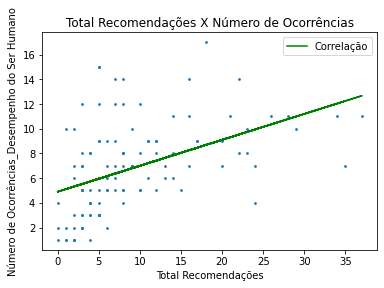

In [83]:
plt.scatter(X, y, s=3)
plt.plot(X, (X * slope + intercept), color='g')
plt.xlabel('Total Recomendações')
plt.ylabel('Número de Ocorrências_Desempenho do Ser Humano')
plt.legend(['Correlação'])
plt.title('Total Recomendações X Número de Ocorrências')

plt.show()

In [75]:
# Observando o gráfico acima, poderia-se dizer que a hipótese 4 não foi rejeitada. No entanto, é necessário uma análise mais aprofundada e, 
# inclusive, uma investigação se o modelo de regressão acima é o mais indicado para os dados.

In [ ]:
# Desse modo, não é rejeitado que o aumento de recomendações está diretamente ligado ao aumento de ocorrências com fatores de desempenho humano.